In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'Poisson_2D'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

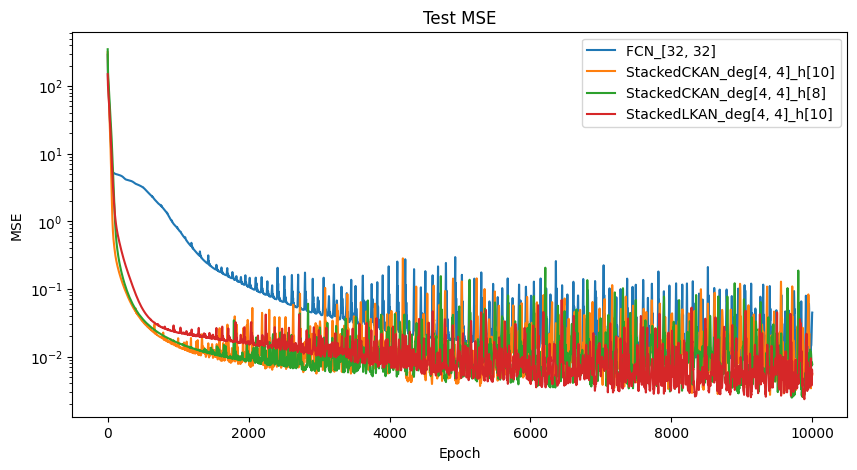

In [4]:
analyser.plot_mses(filter=lambda x: 'FCN_[32, 32]' in x or '_h[10]' in x or '_h[8]' in x)

<Figure size 700x700 with 0 Axes>

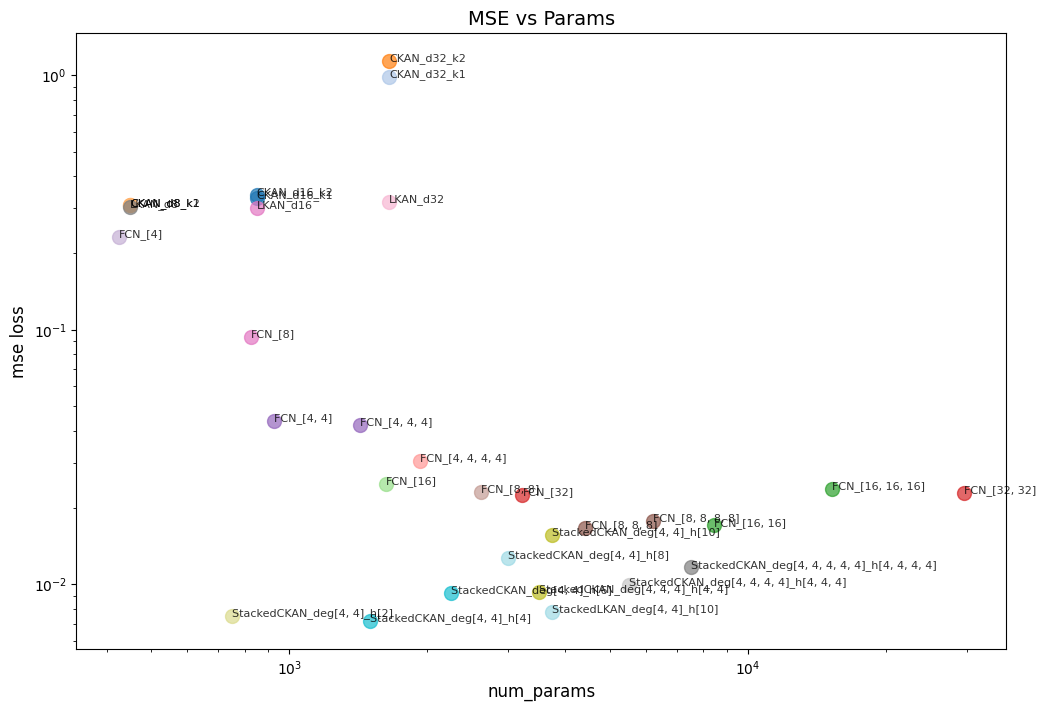

In [5]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

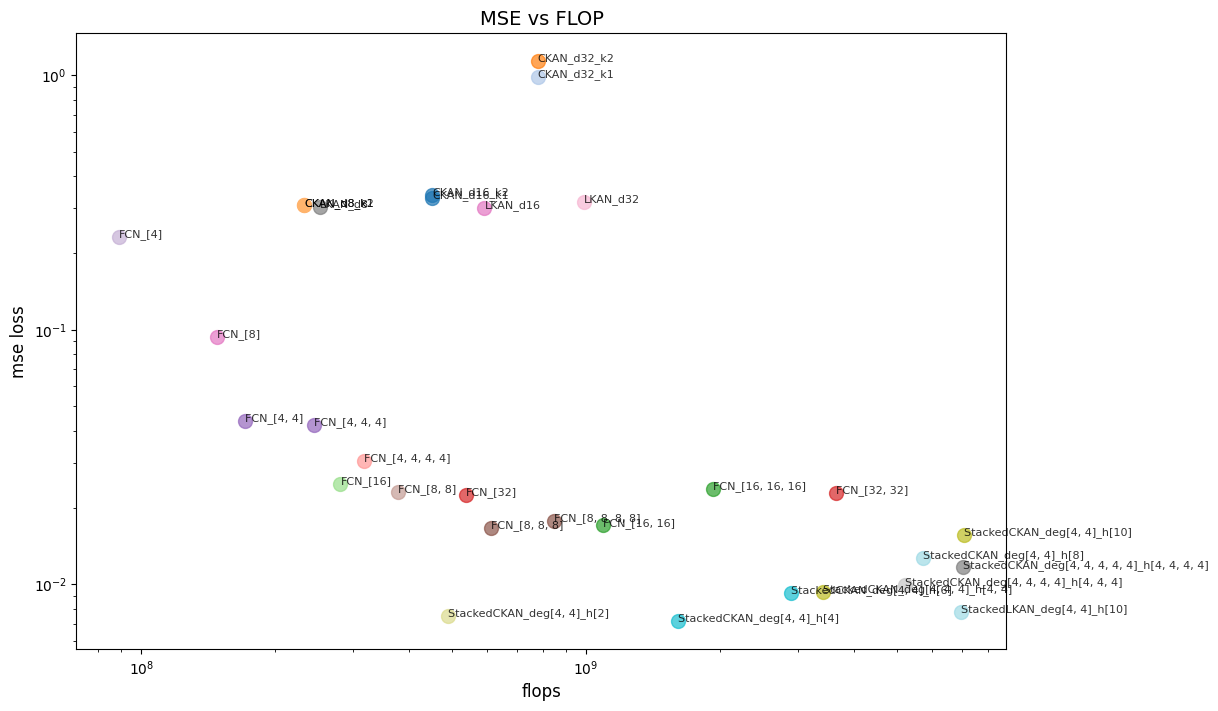

In [6]:
analyser.plot_mse_over_flops()

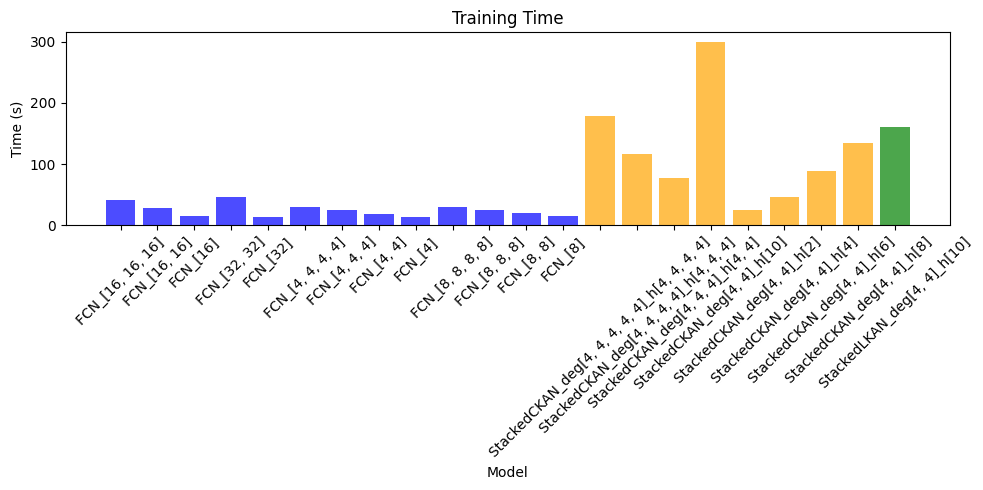

In [7]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

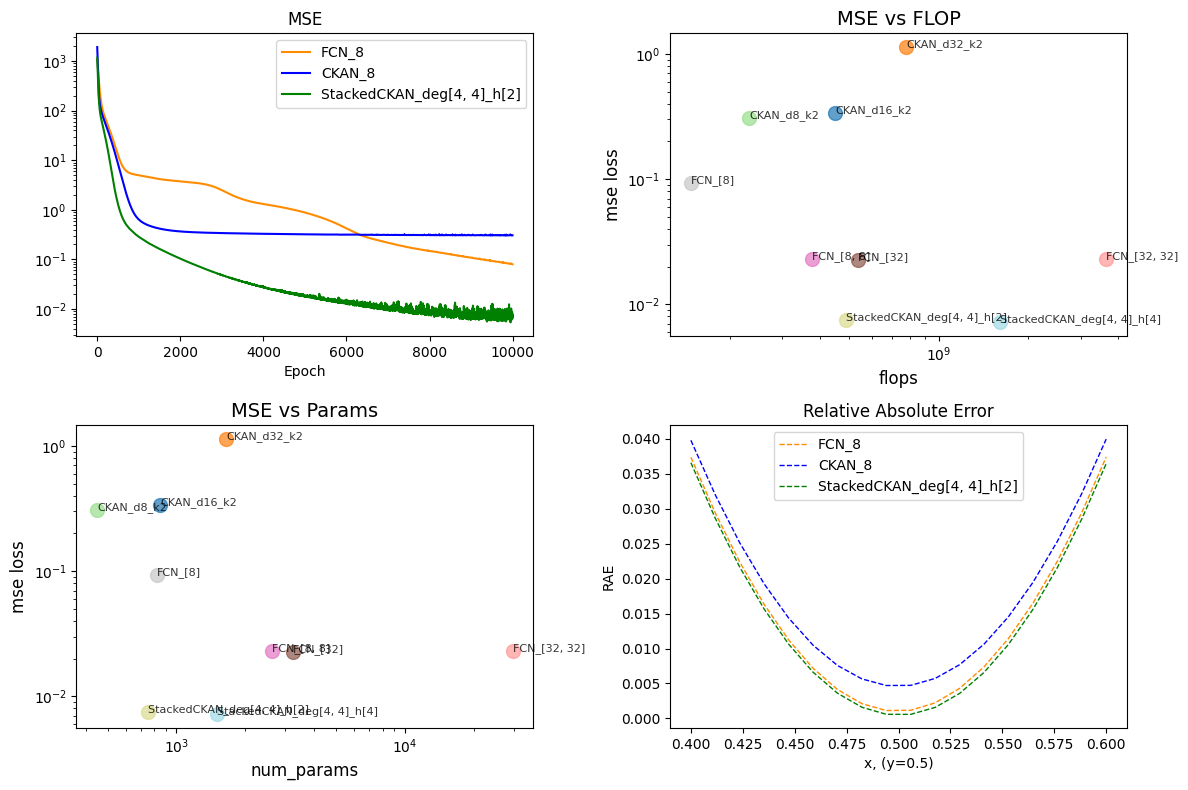

In [8]:
f = lambda x: x in [
    'CKAN_d8_k2',
    'CKAN_d16_k2',
    'CKAN_d32_k2',
    'StackedCKAN_deg[4, 4]_h[2]',
    'StackedCKAN_deg[4, 4]_h[4]',
    'FCN_[8]',
    'FCN_[32]',
    'FCN_[8, 8]',
    'FCN_[32, 32]',
]

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.semilogy(analyser.mses['FCN_[8]'], label='FCN_8', color='darkorange')
plt.semilogy(analyser.mses['CKAN_d8_k2'], label='CKAN_8', color='blue')
plt.semilogy(analyser.mses['StackedCKAN_deg[4, 4]_h[2]'], label='StackedCKAN_deg[4, 4]_h[2]', color='green')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2,2,2)
analyser.plot_mse_over_flops(filter=f, noshow=True, legend=False)

plt.subplot(2,2,3)
analyser.plot_mse_over_params(filter=f, noshow=True, legend=False)

pred_file = f'test_10000.npy'
exact_file = 'test_exact.npy'


def rae(pred, exact):
    return np.abs(pred - exact / np.abs(exact))


plt.subplot(2,2,4)

xs = np.linspace(0.4, 0.6, 18)
exact = np.load(os.path.join(test_path, 'FCN_[8]', exact_file))
exact_slice = exact.reshape(100, 100, 1)[50, 41:59, 0]

pred1 = np.load(os.path.join(test_path, 'FCN_[8]', pred_file))
pred1_slice = pred1.reshape(100, 100, 1)[50, 41:59, 0]
plt.plot(xs, rae(pred1_slice, exact_slice), label='FCN_8', linestyle='--', color='darkorange', linewidth=1)


pred2 = np.load(os.path.join(test_path, 'CKAN_d8_k2', pred_file))
pred2_slice = pred2.reshape(100, 100, 1)[50, 41:59, 0]
plt.plot(xs, rae(pred2_slice, exact_slice), label='CKAN_8', linestyle='--', color='blue', linewidth=1)

pred3 = np.load(os.path.join(test_path, 'StackedCKAN_deg[4, 4]_h[2]', pred_file))
pred3_slice = pred3.reshape(100, 100, 1)[50, 41:59, 0]
plt.plot(xs, rae(pred3_slice, exact_slice), label='StackedCKAN_deg[4, 4]_h[2]', linestyle='--', color='green', linewidth=1)

plt.title('Relative Absolute Error')
plt.xlabel('x, (y=0.5)')
plt.ylabel('RAE')
plt.legend()

# plt.subplot(3,2,2)
# pred = np.load(os.path.join(test_path, 'FCN_8', pred_file))
# exact = np.load(os.path.join(test_path, 'FCN_8', exact_file))
# plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
# plt.plot(pred, label=f'FCN_8 prediction', linestyle='--', color='darkorange', linewidth=1)
# plt.legend()

# plt.subplot(3,2,4)
# pred = np.load(os.path.join(test_path, 'CKAN_8', pred_file))
# exact = np.load(os.path.join(test_path, 'CKAN_8', exact_file))
# plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
# plt.plot(pred, label=f'CKAN_8 prediction', linestyle='--', color='blue', linewidth=1)
# plt.legend()

# plt.subplot(3,2,6)
# pred = np.load(os.path.join(test_path, 'StackedCKAN_d4_h2', pred_file))
# exact = np.load(os.path.join(test_path, 'StackedCKAN_d4_h2', exact_file))
# plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
# plt.plot(pred, label=f'StackedCKAN_d[4]_h[2] prediction', linestyle='--', color='green', linewidth=1)
# plt.legend()

plt.tight_layout()
plt.show()

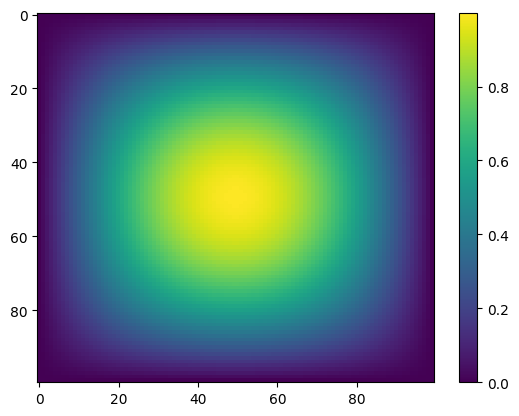

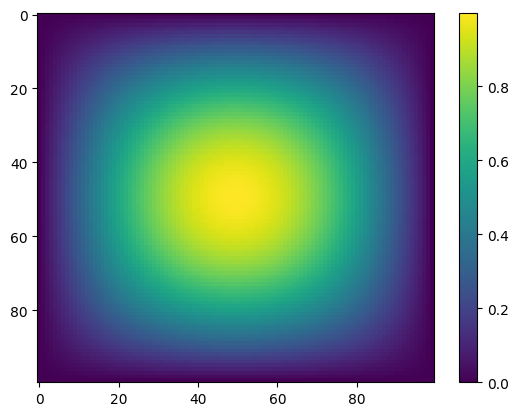

In [9]:
plt.imshow(exact.reshape(100, 100, 1), cmap='viridis', aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(pred1.reshape(100, 100, 1), cmap='viridis', aspect='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_1466610/3009276227.py:34: RuntimeWarning: invalid value encountered in divide
  return np.abs(pred - exact / np.abs(exact))


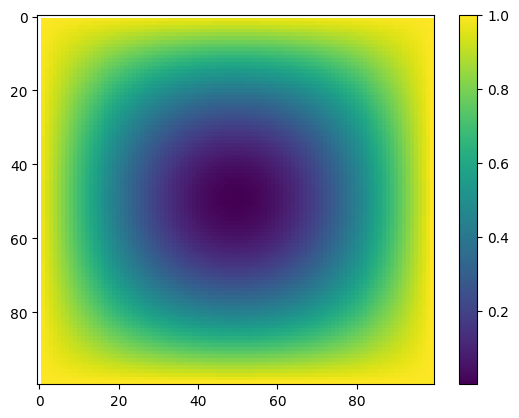

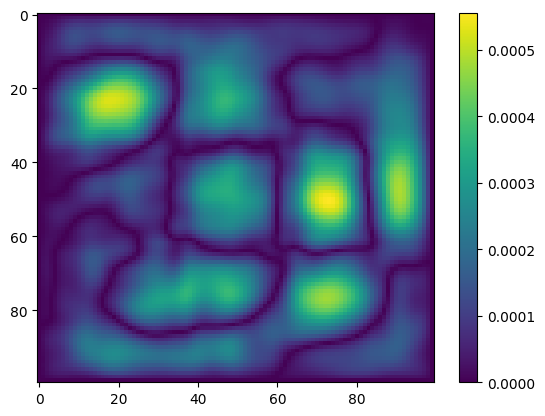

In [10]:
plt.imshow(rae(pred3, exact).reshape(100, 100, 1), cmap='viridis', aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(np.abs(pred3-exact).reshape(100, 100, 1), cmap='viridis', aspect='auto')
plt.colorbar()

In [11]:
analyser.runs

['CKAN_d16_k1',
 'CKAN_d16_k2',
 'CKAN_d32_k1',
 'CKAN_d32_k2',
 'CKAN_d8_k1',
 'CKAN_d8_k2',
 'FCN_[16, 16, 16]',
 'FCN_[16, 16]',
 'FCN_[16]',
 'FCN_[32, 32]',
 'FCN_[32]',
 'FCN_[4, 4, 4, 4]',
 'FCN_[4, 4, 4]',
 'FCN_[4, 4]',
 'FCN_[4]',
 'FCN_[8, 8, 8, 8]',
 'FCN_[8, 8, 8]',
 'FCN_[8, 8]',
 'FCN_[8]',
 'LKAN_d16',
 'LKAN_d32',
 'LKAN_d8',
 'StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4]_h[4, 4]',
 'StackedCKAN_deg[4, 4]_h[10]',
 'StackedCKAN_deg[4, 4]_h[2]',
 'StackedCKAN_deg[4, 4]_h[4]',
 'StackedCKAN_deg[4, 4]_h[6]',
 'StackedCKAN_deg[4, 4]_h[8]',
 'StackedLKAN_deg[4, 4]_h[10]']

In [12]:
import json

for run in analyser.runs:
    with open(os.path.join(test_path, run, 'test_meta.json'), 'r') as f:
        m = json.load(f)
        print(f'{run}: {m['param_count'][0]/25}')

CKAN_d16_k1: 34.0
CKAN_d16_k2: 34.0
CKAN_d32_k1: 66.0
CKAN_d32_k2: 66.0
CKAN_d8_k1: 18.0
CKAN_d8_k2: 18.0
FCN_[16, 16, 16]: 609.0
FCN_[16, 16]: 337.0
FCN_[16]: 65.0
FCN_[32, 32]: 1185.0
FCN_[32]: 129.0
FCN_[4, 4, 4, 4]: 77.0
FCN_[4, 4, 4]: 57.0
FCN_[4, 4]: 37.0
FCN_[4]: 17.0
FCN_[8, 8, 8, 8]: 249.0
FCN_[8, 8, 8]: 177.0
FCN_[8, 8]: 105.0
FCN_[8]: 33.0
LKAN_d16: 34.0
LKAN_d32: 66.0
LKAN_d8: 18.0
StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]: 300.0
StackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]: 220.0
StackedCKAN_deg[4, 4, 4]_h[4, 4]: 140.0
StackedCKAN_deg[4, 4]_h[10]: 150.0
StackedCKAN_deg[4, 4]_h[2]: 30.0
StackedCKAN_deg[4, 4]_h[4]: 60.0
StackedCKAN_deg[4, 4]_h[6]: 90.0
StackedCKAN_deg[4, 4]_h[8]: 120.0
StackedLKAN_deg[4, 4]_h[10]: 150.0


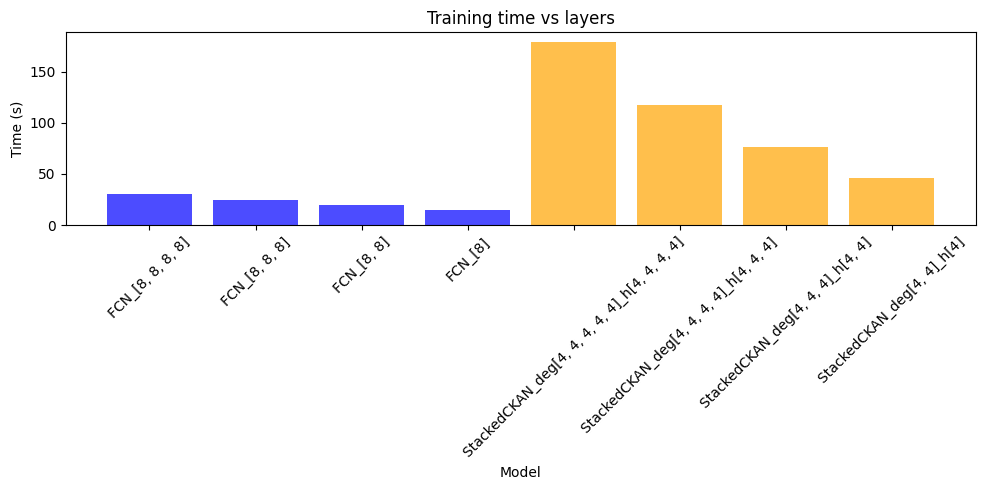

In [13]:
import re
analyser.plot_training_times(filter=lambda x: re.match('StackedCKAN_deg[4[, 4]*]_h[4[, 4]*]', x) or re.match('FCN_[8[, 8]*]', x), title='Training time vs layers') #(Optimized)*

In [14]:
analyser.runs

['CKAN_d16_k1',
 'CKAN_d16_k2',
 'CKAN_d32_k1',
 'CKAN_d32_k2',
 'CKAN_d8_k1',
 'CKAN_d8_k2',
 'FCN_[16, 16, 16]',
 'FCN_[16, 16]',
 'FCN_[16]',
 'FCN_[32, 32]',
 'FCN_[32]',
 'FCN_[4, 4, 4, 4]',
 'FCN_[4, 4, 4]',
 'FCN_[4, 4]',
 'FCN_[4]',
 'FCN_[8, 8, 8, 8]',
 'FCN_[8, 8, 8]',
 'FCN_[8, 8]',
 'FCN_[8]',
 'LKAN_d16',
 'LKAN_d32',
 'LKAN_d8',
 'StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4]_h[4, 4]',
 'StackedCKAN_deg[4, 4]_h[10]',
 'StackedCKAN_deg[4, 4]_h[2]',
 'StackedCKAN_deg[4, 4]_h[4]',
 'StackedCKAN_deg[4, 4]_h[6]',
 'StackedCKAN_deg[4, 4]_h[8]',
 'StackedLKAN_deg[4, 4]_h[10]']

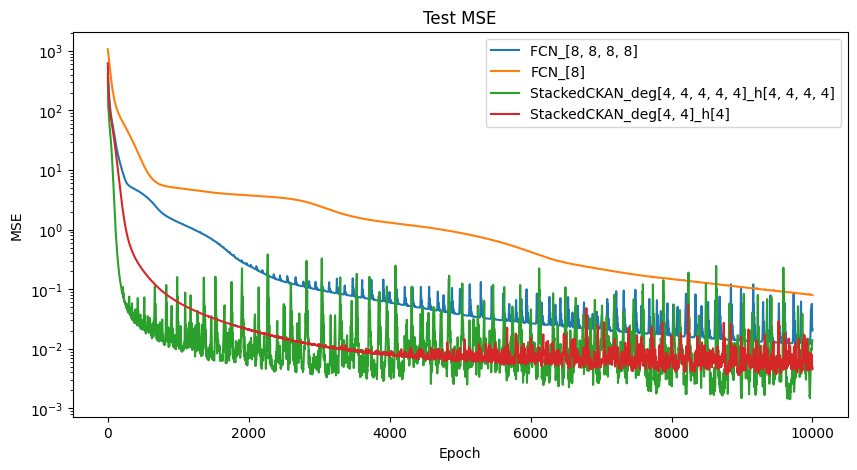

In [15]:
analyser.plot_mses(filter=lambda x: x in [
    'FCN_[8]',
    'FCN_[8, 8, 8, 8]',
    'StackedCKAN_deg[4, 4]_h[4]',
    'StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]'
])

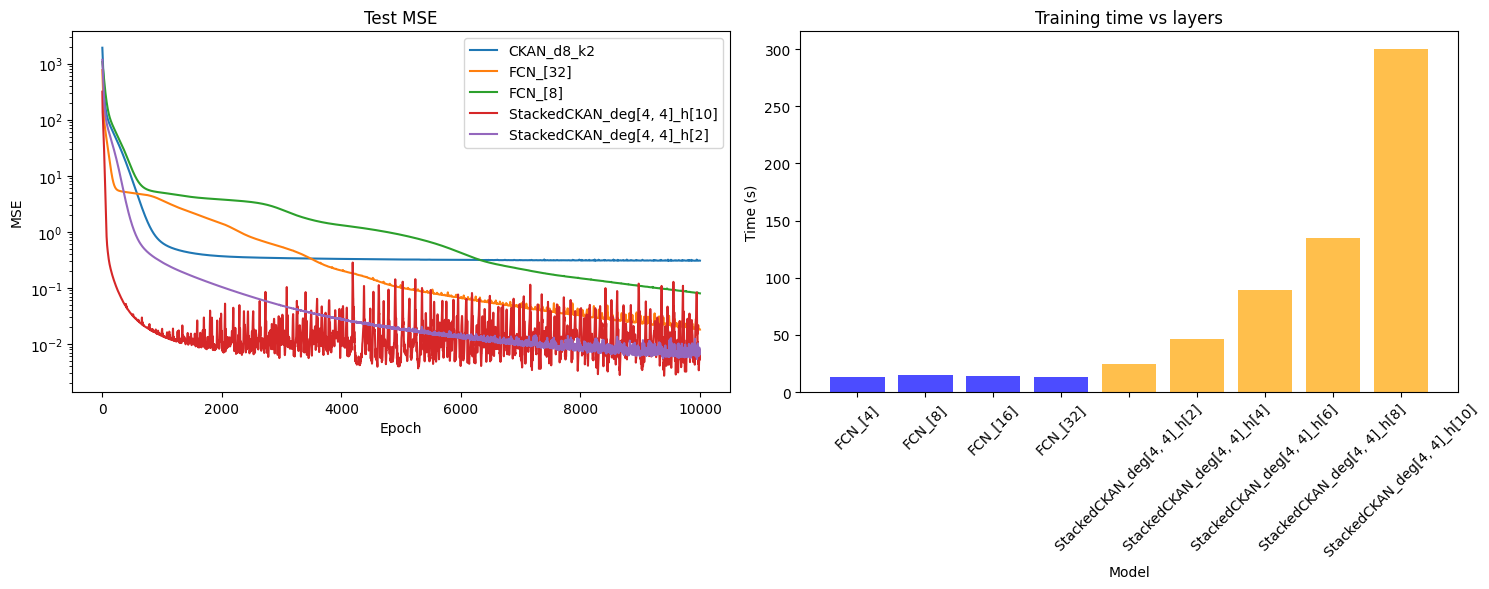

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
analyser.plot_mses(filter=lambda x: x in [
    'FCN_[8]',
    'FCN_[32]',
    'StackedCKAN_deg[4, 4]_h[2]',
    'StackedCKAN_deg[4, 4]_h[10]',
    'CKAN_d8_k2',
], noshow=True)

plt.subplot(1,2,2)
g = [
    'FCN_[4]',
    'FCN_[8]',
    'FCN_[16]',
    'FCN_[32]',
    'StackedCKAN_deg[4, 4]_h[2]',
    'StackedCKAN_deg[4, 4]_h[4]',
    'StackedCKAN_deg[4, 4]_h[6]',
    'StackedCKAN_deg[4, 4]_h[8]',
    'StackedCKAN_deg[4, 4]_h[10]'
]
analyser.plot_training_times_from_list(l=g, title='Training time vs layers', noshow=True)
# analyser.plot_training_times(filter=lambda x: re.match('StackedCKAN_deg\[4, 4]_h\[[0-9]*]', x) or re.match('FCN_[[0-9]*]', x), title='Training time vs layers', noshow=True)

plt.tight_layout()
plt.show()
